# Linear_regression
y = a * x + b

### 导入库

In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

### 仿真数据

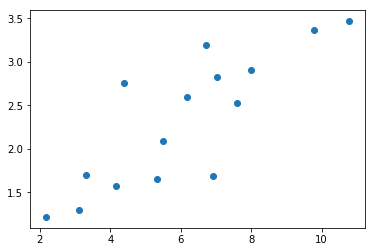

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 绘图
plt.scatter(x_train, y_train)
plt.show()

### 模型
y = a * x + b

In [3]:
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
model

Linear(in_features=1, out_features=1, bias=True)

### 损失函数
$loss = \frac{1}{m}\sum{(y_i - \overline{y_i})^2}$

In [4]:
loss = nn.MSELoss()
loss

MSELoss()

### 优化算子

In [5]:
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### 训练模型

Epoch[5/60], loss:34.1552
Epoch[10/60], loss:13.9478
Epoch[15/60], loss:5.7615
Epoch[20/60], loss:2.4450
Epoch[25/60], loss:1.1014
Epoch[30/60], loss:0.5571
Epoch[35/60], loss:0.3366
Epoch[40/60], loss:0.2472
Epoch[45/60], loss:0.2109
Epoch[50/60], loss:0.1962
Epoch[55/60], loss:0.1903
Epoch[60/60], loss:0.1878


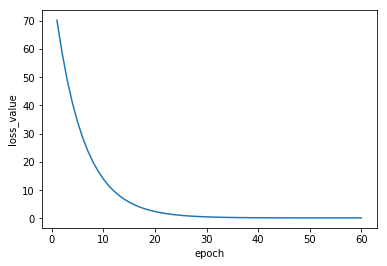

In [6]:
num_epochs = 60
loss_result = []
for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # forward
    outputs = model(inputs)
    loss_value = loss(outputs, targets)
    
    # backward
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch[%d/%d], loss:%.4f' % (epoch+1, num_epochs, loss_value.item()))
    loss_result.append(loss_value.item())

# 绘图
plt.plot(np.arange(1, len(loss_result)+1), np.array(loss_result))
plt.xlabel('epoch')
plt.ylabel('loss_value')
plt.show()

### 测试

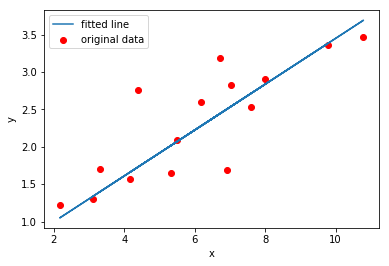

In [7]:
y = model(torch.from_numpy(x_train)).detach().numpy()

# 绘图
plt.scatter(x_train, y_train, color='r', label='original data')
plt.plot(x_train, y, label='fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 存储

In [8]:
file_path = 'model.pkl'
torch.save(model, file_path)